<h1>Importing Necessities</h1>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
import math
import gensim.downloader as api

In [5]:
print("np version : {}".format(np.__version__))
print("pd version : {}".format(pd.__version__))
print("may chaos take the world.")

np version : 1.24.1
pd version : 1.5.3
may chaos take the world.


<h1>Opening data</h1>

In [6]:
dataset = pd.read_excel("Dataset.xlsx")
questionList = dataset["Question"].unique()
answerList = dataset["Answer"]
len(answerList)

72

Preprocessing

In [7]:
# case folding
for i in range(len(answerList)):
    answerList[i] = answerList[i].lower()
    # print(answerList[i])

for i in range(len(questionList)):
    questionList[i] = questionList[i].lower()
    # print(questionList[i])


C:\Users\peter\AppData\Local\Temp\ipykernel_18680\2053709546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = answerList[i].lower()


In [5]:
# remove punc

for i in range(len(answerList)):
    answerList[i] = "".join([char for char in answerList[i] if char not in string.punctuation])
# answerList

C:\Users\peter\AppData\Local\Temp\ipykernel_3076\2693791488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = "".join([char for char in answerList[i] if char not in string.punctuation])


Tokenizing

In [8]:
# tokenize things
# nltk.download()
from nltk import word_tokenize
for i in range(len(answerList)):
    answerList[i] = word_tokenize(answerList[i])
    print(answerList[i])

['everybody', 'should', 'believe', 'that', 'they', 'are', 'creations', ',', 'made', 'by', 'a', 'creator', '.', 'it', 'is', 'a', 'prerequisite', 'to', 'believing', 'anything', 'else', 'that', 'comes', 'after', '.']
['we', 'came', 'from', 'evolution', '.', 'this', 'is', 'undeniable', ',', 'and', 'the', 'charles', 'darwin', "'s", 'evolution', 'model', 'is', 'the', 'most', 'widely', 'accepted', 'theory', 'to', 'this', '.', 'we', 'evolved', 'from', 'unicellular', 'bacteriae', ',', 'to', 'fish', ',', 'to', 'amphibious', 'creatures', ',', 'to', 'mammals', ',', 'to', 'apes', ',', 'then', 'all', 'the', 'way', 'to', 'humans', '.']
['we', 'do', "n't", 'really', 'need', 'to', 'exist', '.', 'even', 'if', 'i', 'do', "n't", 'exist', ',', 'everything', 'would', 'go', 'on', 'as', 'it', "'s", 'supposed', 'to', 'be', '.', 'my', 'existence', 'is', 'one', 'amongst', 'many', '.', 'it', 'should', 'not', 'gravely', 'affect', 'the', 'world', 'and', 'life', 'would', 'go', 'on', '.']
['i', 'do', "n't", 'think', 

C:\Users\peter\AppData\Local\Temp\ipykernel_18680\2377191359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = word_tokenize(answerList[i])


Get set of words

In [9]:
# get set
wordset = set()
wordsum = 0
for i in range(len(answerList)):
    wordsum += len(answerList[i])
    for j in range(len(answerList[i])):
        wordset.add(answerList[i][j])
wordList = list(wordset)
wordsum

2238

In [10]:
print(np.__version__)

1.24.1


Embedding (W2V and Sent2V)

In [11]:
# FINALLY this thing works
# Using word2vec embedding
from gensim.models import Word2Vec
model = Word2Vec(sentences=answerList, vector_size=20, window=5, min_count=0, workers=4, epochs=100, sg=0)


Using a pre-trained model

In [12]:
corpus = api.load('text8')
text8model = Word2Vec(corpus)

In [16]:
w2v2 = text8model.wv

print(w2v2.similar_by_word('soul', topn=5))

[('spirit', 0.7547518014907837), ('destiny', 0.7113960981369019), ('flesh', 0.706361711025238), ('mankind', 0.7063478231430054), ('immortality', 0.6980603337287903)]


In [19]:
# removing words that are not in the corpus.
oldWordList = wordList
for word in wordList:
    if word not in w2v2.key_to_index:
        print("{} has no key in w2v2".format(word))
        wordList.remove(word)
        


In [23]:
# put the vectors in a variable and print it
w2v = model.wv
for item in w2v:
    print(item)

[-0.28220856 -0.05858889  0.6120059   0.7482302  -0.18888305 -0.30423
  0.23300898  1.0406294  -0.8482212   0.18380858  0.7411171  -0.39550164
  0.48469982 -0.30495062  0.545293    0.21941641  0.94627196  0.03344414
 -0.66168976 -0.94836694]
[-0.14931469 -0.03617733  0.4709795   0.8951217  -0.40707663 -0.64498144
  0.10572944  1.0817875  -1.2689924   0.28220415  0.41983327 -0.1347152
  0.30057654 -0.5281833   0.58779114  0.05524291  0.84519607  0.03637482
 -0.79995316 -0.83697164]
[-0.27093428 -0.18535373  0.34105745  0.6023012   0.01210994 -0.14763276
  0.38051137  1.1367261  -0.8484309   0.43631834  0.715432   -0.3320055
  0.38682684 -0.16233452  0.5572749  -0.0917205   1.1631887  -0.17112567
 -0.45722878 -1.0696391 ]
[-0.5823544  -0.36515248  0.24954593  0.5261928  -0.66939324 -0.37249085
  0.19753987  0.46651474 -1.3644948   0.53638506  0.6699549  -0.2625053
  0.2521829  -1.0510505   0.7104735  -0.10860345  1.1433033   0.33210334
 -0.80234295 -0.8279801 ]
[-0.25940052 -0.23316678  

KeyError: "Key '596' not present"

In [25]:
w2v.key_to_index

{'.': 0,
 'is': 1,
 ',': 2,
 'a': 3,
 'the': 4,
 'it': 5,
 'to': 6,
 'that': 7,
 'not': 8,
 'of': 9,
 'if': 10,
 'are': 11,
 'be': 12,
 'in': 13,
 'god': 14,
 'i': 15,
 '?': 16,
 "n't": 17,
 'and': 18,
 'we': 19,
 "'s": 20,
 'sin': 21,
 'because': 22,
 'life': 23,
 'but': 24,
 'does': 25,
 'there': 26,
 'for': 27,
 '-': 28,
 'what': 29,
 'would': 30,
 'have': 31,
 'then': 32,
 'as': 33,
 'know': 34,
 'he': 35,
 'this': 36,
 'should': 37,
 'will': 38,
 'all': 39,
 'humans': 40,
 'do': 41,
 'has': 42,
 'with': 43,
 'us': 44,
 'from': 45,
 'no': 46,
 'sins': 47,
 'on': 48,
 'or': 49,
 'you': 50,
 'everything': 51,
 'human': 52,
 'legal': 53,
 'even': 54,
 'just': 55,
 'creator': 56,
 'being': 57,
 'etc': 58,
 'prochoice': 59,
 'think': 60,
 'how': 61,
 'fetus': 62,
 'person': 63,
 'mistake': 64,
 'still': 65,
 'created': 66,
 'who': 67,
 'his': 68,
 'only': 69,
 'live': 70,
 'matter': 71,
 'death': 72,
 'one': 73,
 'maybe': 74,
 'world': 75,
 'so': 76,
 'him': 77,
 'child': 78,
 'man': 79

In [26]:
w2v.similar_by_word("matter", topn=5)

[('no', 0.963542103767395),
 ('form', 0.9579060673713684),
 ('pointless', 0.9566023349761963),
 ('how', 0.9451427459716797),
 ('goes', 0.9395142197608948)]

Making sentence vectors...

In [41]:
def sent_vector(sentence, w2v_model):
    vecs = [w2v_model[word.lower()] for word in sentence if word in w2v_model.key_to_index]
    norm_vecs = [vec / np.linalg.norm(vec) for vec in vecs if np.linalg.norm(vec) > 0]
    sent_vec = np.mean(vecs, axis=0)
    return sent_vec


In [46]:
vecs = [sent_vector(sentence, w2v2) for sentence in answerList]
vecs = np.array(vecs)

# for vec in vecs:
#     print(len(vec))
#     print(type(vec))
#     print(vec)
# for i in range(len(vecs)):
#     print(answerList[i] , " | ", vecs[i])


72
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [36]:
print(type(vecs))
print(type(vecs[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1>Visualizing this thing with t-SNE</h1>

In [30]:
# plotting
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plottin(w2v):
    labels = []
    tokens = []

    # append tokens and labels
    for i in range(len(w2v)):
        labels.append(w2v.index_to_key[i])
        tokens.append(w2v[i])

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

def plotW2V2(w2v, wordList):
    labels = []
    tokens = []

    # append tokens and labels
    for word in wordList:
        labels.append(word)
        tokens.append(w2v[w2v.key_to_index[word]])
    
    # train the model
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    # plot that thang
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


In [33]:
def plotSentence(vecs):
    print(len(vecs))
    print(type(vecs))
    labels = np.arange(len(vecs))
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(vecs)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    pass 


72
<class 'numpy.ndarray'>


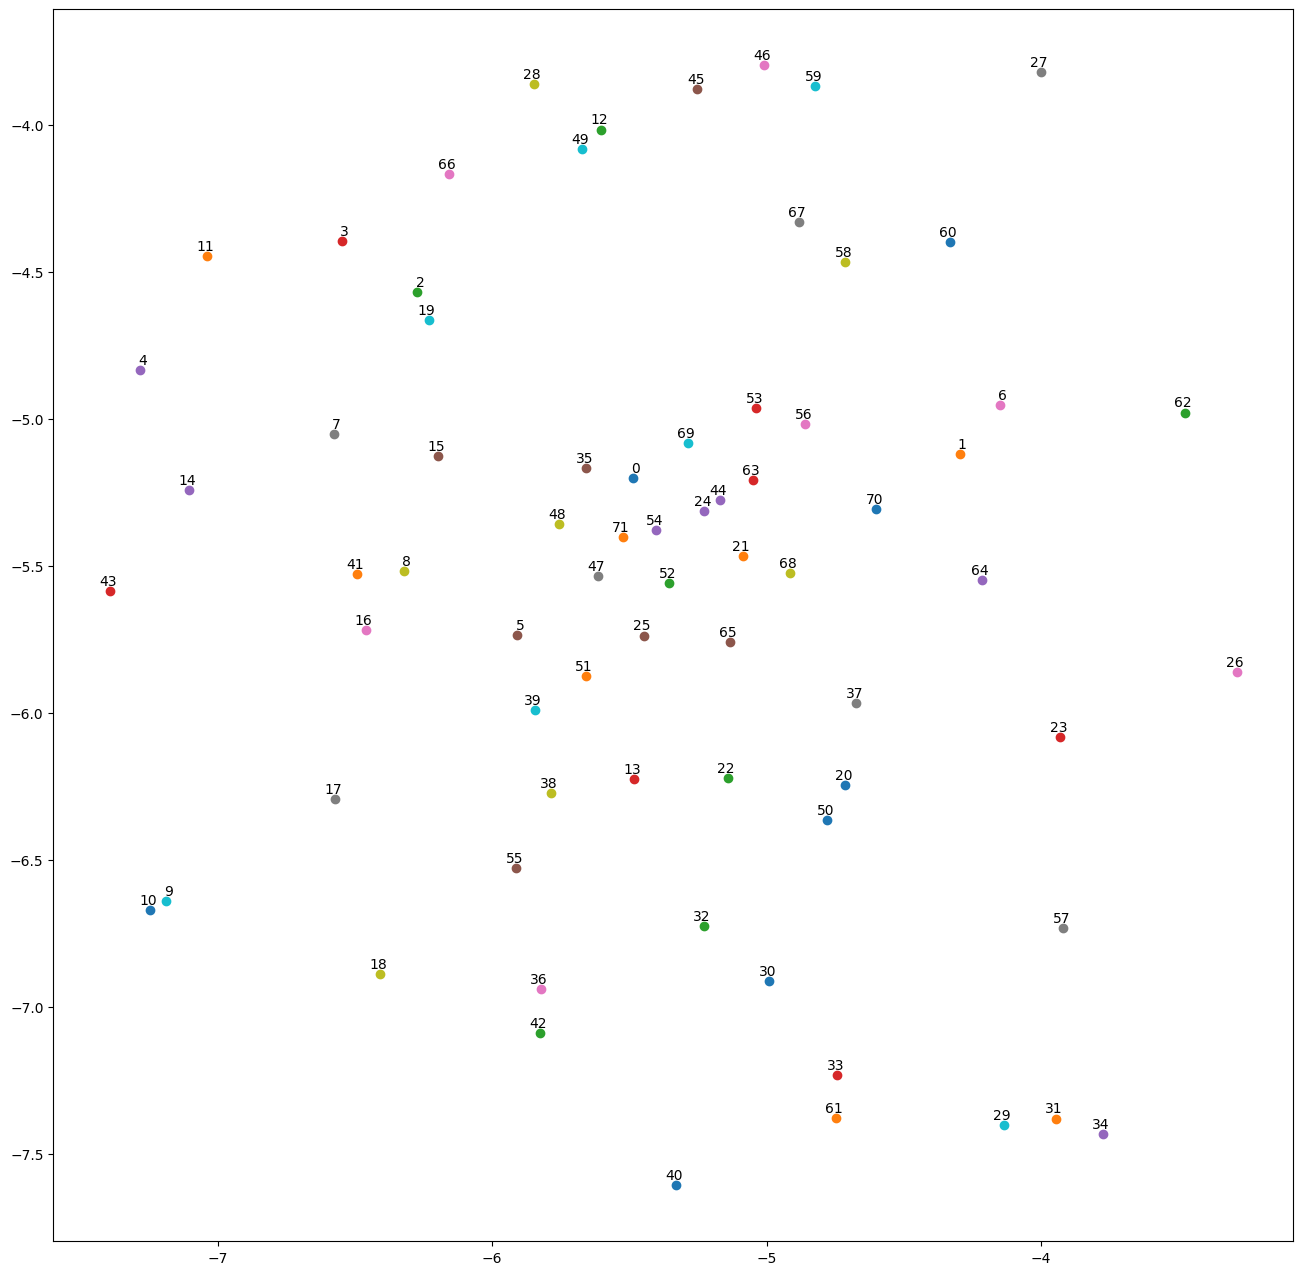

In [34]:
# print(type(w2v[0]))
# for i in range(0,10):
#     print(w2v.index_to_key[i])
#     print(w2v[i])

# plotW2V2(w2v=w2v2, wordList=wordList)

plotSentence(vecs)


['yes', 'because', 'were', 'a', 'part', 'of', 'a', 'community', 'where', 'god', 'put', 'us', 'in', 'there', 'should', 'be', 'a', 'purpose', 'and', 'meaning', 'to', 'it', 'shouldnt', 'it']
['holiness', 'is', 'a', 'character', 'creating', 'something', 'possessing', 'a', 'freewill', 'innately', 'gives', 'it', 'a', 'chance', 'to', 'turn', 'out', 'different', 'we', 'wouldnt', 'have', 'free', 'will', 'it', 'is', 'because', 'of', 'love']
['kbbi', 'the', 'process', 'of', 'baby', 'child', 'teenager', 'adult', 'to', 'elderly', 'adam', 'and', 'eve', 'were', 'not', 'from', 'a', 'fetus', 'meaning', 'it', 'was', 'just', 'a', 'regenerating', 'process', 'not', 'yet', 'human', 'in', 'my', 'personal', 'opinion', 'a', 'human', 'being', 'is', 'a', 'person', 'who', 'lives', 'in', 'this', 'world', 'and', 'has', 'a', 'life', 'i', 'disagree', 'with', 'the', 'kbbi', 'this', 'fetus', 'is', 'human', 'but', 'still', 'prochoice', 'because', 'he', 'is', 'human', 'and', 'we', 'dont', 'know', 'what', 'his', 'fate', '

<h1>Clustering</h1>

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


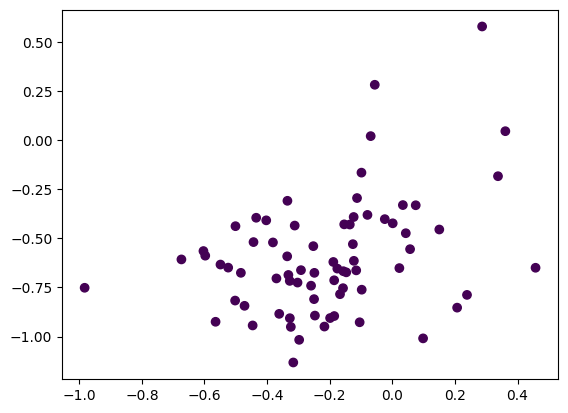

In [34]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, normalized_mutual_info_score

dbscan = DBSCAN(eps=0.4, min_samples=3)

clusters = dbscan.fit_predict(vecs)
print(clusters)

plt.scatter(vecs[:, 0], vecs[:, 1], c=clusters)
plt.show()